
# Food Insecurity Prediction (IPC Severity 1–5)

**Team:** Conrad, Immaculate, Mable, Nicholas, Denis, Charles, Elizabeth  
  
**Goal:** Predict **IPC severity (1–5)** using socio-economic, conflict, agriculture, and climate factors.



## Roles & Sections (Two per section)
- **Data Description & Sources** → *Elizabeth* + *Mable + Immaculate*  
- **Data Cleaning & Missing Values (MANDATORY before EDA)** → *Conrad* + *Denis*  
- **Exploratory Data Analysis (Univariate + Multivariate)** → *Mable* + *Nicholas*  
- **Classical ML Models** → *Charles* + *Nicholas*  
- **Neural Network Model** → *Conrad* + *Immaculate*  
- **Findings, Conclusions & Slides** → *Charles + Denis + Conrad*



## 1) Data Description & Sources — *Elizabeth, Immaculate and Mable*
- Brief the target: `ipc_phase` (1–5).
- Identify the keys: `iso3`, `country`, `year`, `phase_type`.
- Describe features: socio-economic, conflict, crops, climate.
- Link to data dictionary.


# 📊 Dataset Overview

This project uses a **unique, multi-source real-world dataset** on food insecurity, combining several international datasets to build a predictive model of food insecurity severity.

- **Sources**:  
  - **IPC (Integrated Food Security Phase Classification)** via the Humanitarian Data Exchange (HDX) → Target variable (IPC Phases 1–5).  
  - **World Bank Development Indicators** → Socio-economic variables (population, GDP, poverty).  
  - **FAOSTAT (Food and Agriculture Organization of the UN)** → Agricultural production (maize, rice, wheat, sorghum, millet yields & production) and climate indicators (temperature change, variability).  
  - **UCDP (Uppsala Conflict Data Program)** → Conflict-related fatalities (battle-related deaths, one-sided violence against civilians).  

- **Coverage**: The dataset spans over **20 years (2003–2024)** across multiple countries, focusing on food-insecure regions with IPC assessments.  

- **Size**: After combining all sources, the dataset contains **~927–1,200 country–year observations**, each with dozens of explanatory features. This size is adequate for robust machine learning experimentation.

---

# 🎯 Target Variable: IPC Phase Classification

The target is the **Integrated Food Security Phase Classification (IPC)**, an international standard for classifying food insecurity severity:

- **Phase 1:** Minimal/None  
- **Phase 2:** Stressed  
- **Phase 3:** Crisis  
- **Phase 4:** Emergency  
- **Phase 5:** Catastrophe/Famine  

This variable is categorical, with five ordered levels, representing escalating severity of hunger crises.

---

# 🔑 Key Identifiers & Feature Groups

Each row in the dataset is uniquely identified by:  
- **iso3** (country code), **country**, **year**, and **phase_type** (current or projected IPC assessment).  

The predictive features are grouped into **four major domains**:

1. **Socio-economic Factors (World Bank)**  
   - `population_total` → country population size  
   - `gdp_current_usd` → economic strength (current USD)  
   - `poverty_rate` → share of population below $2.15/day  

2. **Conflict (UCDP)**  
   - `brd_deaths` → battle-related deaths from armed conflict  
   - `one_sided_deaths` → civilian-targeted violence fatalities  

3. **Crops/Agriculture (FAOSTAT)**  
   - Staple crop yields & production: maize, rice, wheat, millet, sorghum  
   - Proxy for domestic food availability  

4. **Climate (FAOSTAT Climate Change Dataset)**  
   - `Climate: Temperature change` → mean annual anomaly (°C)  
   - `Climate: Standard Deviation` → variability in climate indicators  
   - Reflects environmental shocks affecting agriculture  



## 2) Data Cleaning & Missing Values (BEFORE EDA) — *Conrad + Denis*
Steps:
1. Inspect missingness (% per column).
2. Drop columns with >70% missingness.
3. Impute:
   - Numeric: median
   - Conflict deaths: fill NaN with 0 (assume no reported fatalities)
4. Optional: per-country forward-fill for GDP/population if using time-aware models.
5. Save a `df_model.csv` for modeling & EDA.


In [ ]:
#Preview the data
import pandas as pd
import numpy as np

df = pd.read_csv('/content/sample_data/final_food_insecurity_dataset.csv')
df.head()

,iso3,country,year,phase_type,ipc_phase,population_total,gdp_current_usd,poverty_rate,brd_deaths,one_sided_deaths,...,Crop: Maize (corn) - Production,Crop: Maize (corn) - Yield,Crop: Millet - Production,Crop: Millet - Yield,Crop: Rice - Production,Crop: Rice - Yield,Crop: Sorghum - Production,Crop: Sorghum - Yield,Crop: Wheat - Production,Crop: Wheat - Yield
0,AFG,Afghanistan,2017,current,2,35688935.0,1.875346e+10,NaN,18974.0,96.0,...,173912.0,1295.7,4850.97,1628.0,505100.0,4614.8,NaN,NaN,4280776.0,2034.2
1,AFG,Afghanistan,2017,proj1,1,35688935.0,1.875346e+10,NaN,18974.0,96.0,...,173912.0,1295.7,4850.97,1628.0,505100.0,4614.8,NaN,NaN,4280776.0,2034.2
2,AFG,Afghanistan,2017,proj2,1,35688935.0,1.875346e+10,NaN,18974.0,96.0,...,173912.0,1295.7,4850.97,1628.0,505100.0,4614.8,NaN,NaN,4280776.0,2034.2
3,AFG,Afghanistan,2018,current,3,36743039.0,1.805322e+10,NaN,25679.0,122.0,...,106670.0,1472.7,2304.50,1814.9,525500.0,4470.9,NaN,NaN,3613300.0,2210.0
4,AFG,Afghanistan,2018,proj1,3,36743039.0,1.805322e+10,NaN,25679.0,122.0,...,106670.0,1472.7,2304.50,1814.9,525500.0,4470.9,NaN,NaN,3613300.0,2210.0


In [ ]:
#Check for missing values
df.isnull().sum()

,0
iso3,0
country,0
year,0
phase_type,0
ipc_phase,0
population_total,90
gdp_current_usd,132
poverty_rate,825
brd_deaths,627
one_sided_deaths,723


In [ ]:
# ===============================================
# Missing-Value Handling (Preserve ALL rows)
# - Conflict deaths -> 0 if missing
# - Per-country time interpolation: population, GDP, poverty
# - Country median fallback, then global median
# - Categorical -> mode
# - Adds *_imputed flags for transparency
# - Saves: df_imputed_for_eda.csv
# ===============================================

import pandas as pd
import numpy as np

# 0) LOAD DATA ---------------------------------------------------------------
# Upload via Colab (files.upload) or mount Drive, then set the path:
# from google.colab import files; files.upload()
# or: from google.colab import drive; drive.mount('/content/drive')
#df = pd.read_csv("final_food_insecurity_dataset.csv")  # change to your file

# 1) COLUMN SETUP ------------------------------------------------------------
id_cols = ["iso3","country","year","phase_type"]
target_col = "ipc_phase"
feature_cols = [c for c in df.columns if c not in id_cols + [target_col]]

numeric_cols = [c for c in feature_cols if pd.api.types.is_numeric_dtype(df[c])]
cat_cols = [c for c in feature_cols if c not in numeric_cols]

def add_flag_and_fill(series, filler):
    """Return filled series and an imputed-flag (1 if filled from NA)."""
    na_mask = series.isna()
    filled = filler(series.copy())
    flag = na_mask.astype(int) & filled.notna().astype(int)
    return filled, flag

# 2) DOMAIN RULES ------------------------------------------------------------
# Conflict deaths: missing -> 0 (assume no reported events)
for col in ["brd_deaths", "one_sided_deaths"]:
    if col in df.columns:
        df[col], df[col + "_imputed"] = add_flag_and_fill(df[col], lambda s: s.fillna(0))

# 3) TIME-AWARE INTERPOLATION (per country) ----------------------------------
trend_cols = [c for c in ["population_total","gdp_current_usd","poverty_rate"] if c in df.columns]

def _interp_group(s):
    s = pd.to_numeric(s, errors="coerce")
    return s.interpolate(method="linear", limit_direction="both")

if trend_cols:
    df = df.sort_values(["iso3","year"])
    for col in trend_cols:
        before_na = df[col].isna()
        df[col] = df.groupby("iso3", group_keys=False)[col].apply(_interp_group)
        # Flag only those that were NA and became filled
        df[col + "_imputed"] = (before_na & df[col].notna()).astype(int)

# 4) COUNTRY MEDIAN, THEN GLOBAL MEDIAN (numeric) ----------------------------
for col in numeric_cols:
    if col not in df.columns:
        continue
    # Country medians for remaining NA
    country_med = df.groupby("iso3")[col].transform("median")
    still_na = df[col].isna()
    df.loc[still_na, col] = country_med[still_na]
    # Global median fallback
    if df[col].isna().any():
        med = pd.to_numeric(df[col], errors="coerce").median()
        was_na = df[col].isna()
        df[col] = pd.to_numeric(df[col], errors="coerce").fillna(med)
        flag_col = col + "_imputed"
        if flag_col in df.columns:
            df[flag_col] = ((df[flag_col] == 1) | was_na).astype(int)
        else:
            df[flag_col] = was_na.astype(int)

# 5) CATEGORICAL -> MODE -----------------------------------------------------
for col in cat_cols:
    mode_val = df[col].mode(dropna=True)
    fill_val = mode_val.iloc[0] if not mode_val.empty else "Unknown"
    was_na = df[col].isna()
    df[col] = df[col].fillna(fill_val)
    df[col + "_imputed"] = was_na.astype(int)

# 6) TARGET (KEEP ROWS) ------------------------------------------------------
# Keep rows even if target is missing; add a flag for later filtering if needed
if target_col in df.columns and df[target_col].isna().any():
    df["missing_target_flag"] = df[target_col].isna().astype(int)

# 7) SAVE OUTPUT -------------------------------------------------------------
df.to_csv("df_imputed_for_eda.csv", index=False)
print("✅ Saved: df_imputed_for_eda.csv")
print("Shape:", df.shape)
print("\nTop 12 columns by % missing AFTER imputation:")
print((df.isna().mean()*100).sort_values(ascending=False).head(12))

✅ Saved: df_imputed_for_eda.csv
Shape: (927, 39)

Top 12 columns by % missing AFTER imputation:
iso3                           0.0
country                        0.0
year                           0.0
phase_type                     0.0
ipc_phase                      0.0
population_total               0.0
gdp_current_usd                0.0
poverty_rate                   0.0
brd_deaths                     0.0
one_sided_deaths               0.0
Climate: Standard Deviation    0.0
Climate: Temperature change    0.0
dtype: float64



## 3) Exploratory Data Analysis — *Mable + Nicholas*
> EDA comes **after** cleaning to avoid misleading plots.

### 3.1 Univariate
- Distribution of `ipc_phase` (bar chart)
- Histograms of GDP, poverty, population, climate indicators

### 3.2 Multivariate
- Correlation matrix of numeric features
- Scatter plots: GDP vs `ipc_phase`, Poverty vs `ipc_phase`, Conflict vs `ipc_phase`
- Boxplots: `ipc_phase` vs key numeric features


import libraries for EDA and modeling

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#load cleaned dataset
df = pd.read_csv('/content/df_imputed_for_eda.csv')
df.head()

,iso3,country,year,phase_type,ipc_phase,population_total,gdp_current_usd,poverty_rate,brd_deaths,one_sided_deaths,...,Crop: Maize (corn) - Production_imputed,Crop: Maize (corn) - Yield_imputed,Crop: Millet - Production_imputed,Crop: Millet - Yield_imputed,Crop: Rice - Production_imputed,Crop: Rice - Yield_imputed,Crop: Sorghum - Production_imputed,Crop: Sorghum - Yield_imputed,Crop: Wheat - Production_imputed,Crop: Wheat - Yield_imputed
0,AFG,Afghanistan,2017,current,2,35688935.0,1.875346e+10,39.5,18974.0,96.0,...,0,0,0,0,0,0,1,1,0,0
1,AFG,Afghanistan,2017,proj1,1,35688935.0,1.875346e+10,39.5,18974.0,96.0,...,0,0,0,0,0,0,1,1,0,0
2,AFG,Afghanistan,2017,proj2,1,35688935.0,1.875346e+10,39.5,18974.0,96.0,...,0,0,0,0,0,0,1,1,0,0
3,AFG,Afghanistan,2018,current,3,36743039.0,1.805322e+10,39.5,25679.0,122.0,...,0,0,0,0,0,0,1,1,0,0
4,AFG,Afghanistan,2018,proj1,3,36743039.0,1.805322e+10,39.5,25679.0,122.0,...,0,0,0,0,0,0,1,1,0,0


In [ ]:
#check for missing values
df.isnull().sum()

,0
iso3,0
country,0
year,0
phase_type,0
ipc_phase,0
population_total,0
gdp_current_usd,0
poverty_rate,0
brd_deaths,0
one_sided_deaths,0


UNIVARIATE

1. DISTRIBUTION OF IPC_PHASE(BAR CHART)

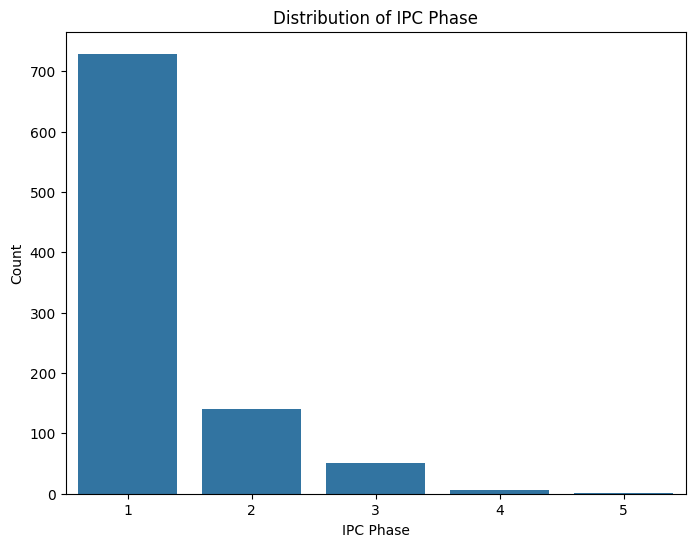

In [ ]:
#distribution of IPC phase
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='ipc_phase')
plt.title('Distribution of IPC Phase')
plt.xlabel('IPC Phase')
plt.ylabel('Count')
plt.show()

The chart shows how many records fall into each IPC Phase:

IPC Phase 1 has the highest count (over 700 observations).

IPC Phase 2 has fewer observations (around 150).

IPC Phase 3 has even fewer (around 50–70).

IPC Phase 4 and 5 have less than 50 counts.

 Interpretation:

The bar chart reveals that IPC Phase 1 dominates the dataset meaning minimal or no food insecurity levels, while higher phases are rare and this shows a class imbalance in food insecurity levels.

2. HISTOGRAMS OF GDP, POVERTY, POPULATION AND CLIMATE INDICATORS.

Under this section we plot distribution of multiple variables, applying log and logit transformations to skewed columns for clearer visualizations.


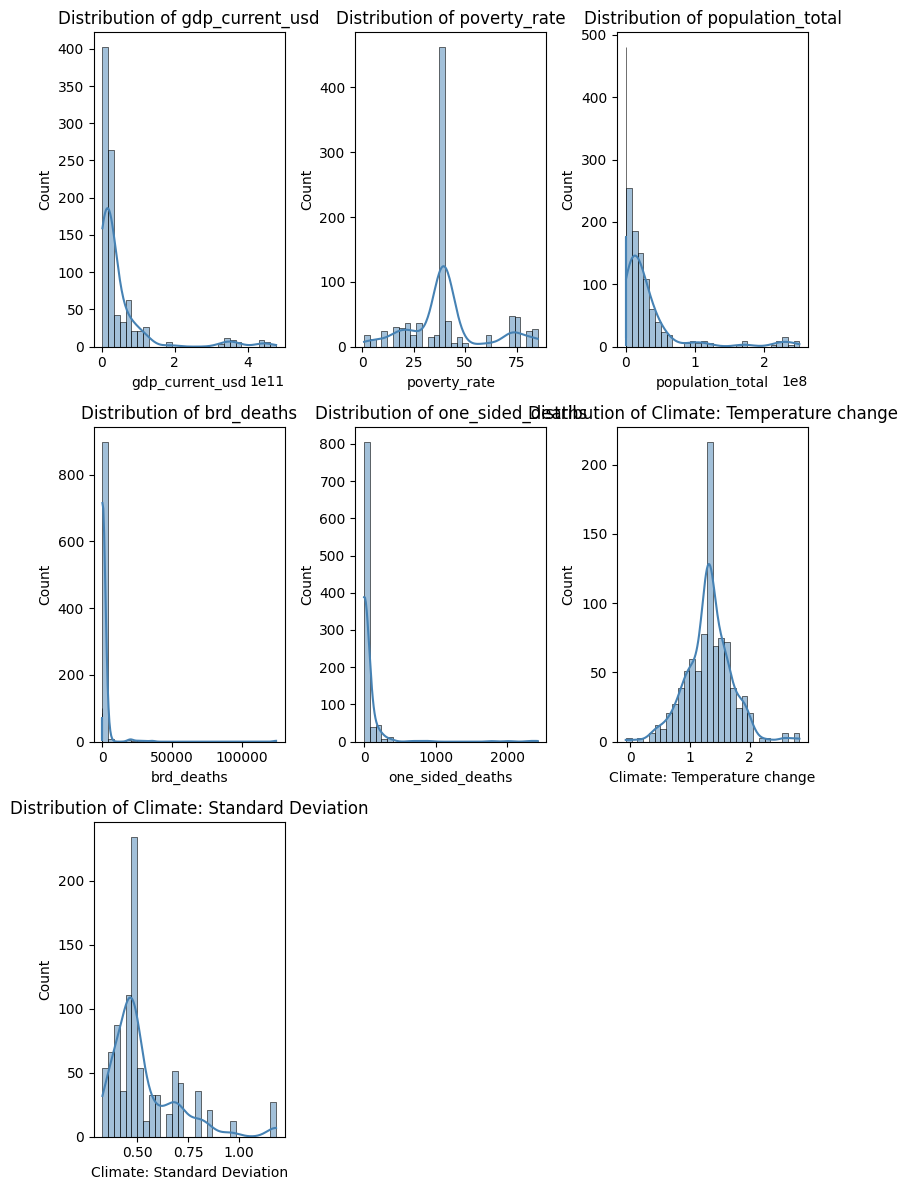

In [ ]:
# Define subplot grid size
n_cols = 3

# Define the columns to plot
plot_cols = [
    "gdp_current_usd", "poverty_rate", "population_total",
    "brd_deaths", "one_sided_deaths", "Climate: Temperature change",
    "Climate: Standard Deviation"
]


n_rows = (len(plot_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 4 * n_rows))

axes = axes.flatten()

for i, c in enumerate(plot_cols):
    data = df[c].dropna()

    if c == "population_total":
        # Original
        sns.histplot(data, kde=True, bins=30, ax=axes[i], color="steelblue")
        axes[i].set_title(f'Distribution of {c}', fontsize=12)
        axes[i].set_xlabel(c)

        # Transformed (log)
        # Check if there's a valid index for the next subplot
        if i + 1 < len(axes):
            data_log = data[data > 0]
            # Check if there's data to plot after filtering
            if not data_log.empty:
                data_log = np.log(data_log)
                sns.histplot(data_log, kde=True, bins=30, ax=axes[i+1], color="steelblue")
                axes[i+1].set_title(f'Distribution of log({c})', fontsize=12)
                axes[i+1].set_xlabel(f'log({c})')
            else:
                 # If no data, hide the subplot
                 fig.delaxes(axes[i+1])


    elif c == "poverty_rate":
        # Original
        sns.histplot(data, kde=True, bins=30, ax=axes[i], color="steelblue")
        axes[i].set_title(f'Distribution of {c}', fontsize=12)
        axes[i].set_xlabel(c)

        # Transformed (logit)
        # Check if there's a valid index for the next subplot
        if i + 1 < len(axes):
            data_logit = data[(data > 0) & (data < 100)] / 100
            # Check if there's data to plot after filtering
            if not data_logit.empty:
                data_logit = np.log(data_logit / (1 - data_logit))
                sns.histplot(data_logit, kde=True, bins=30, ax=axes[i+1], color="steelblue")
                axes[i+1].set_title(f'Distribution of logit({c})', fontsize=12)
                axes[i+1].set_xlabel(f'logit({c})')
            else:
                 # If no data, hide the subplot
                 fig.delaxes(axes[i+1])

    else:
        sns.histplot(data, kde=True, bins=30, ax=axes[i], color="steelblue")
        axes[i].set_title(f'Distribution of {c}', fontsize=12)
        axes[i].set_xlabel(c)

# Hide unused subplots
for j in range(len(plot_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

 1. Distribution of gdp_current_usd

Shape: Very right-skewed (long tail to the right).

Interpretation: Most countries have relatively small GDPs, while a few (e.g., USA, China) dominate with extremely large GDPs.


 2. Distribution of poverty_rate

Shape: Peaks around a central value (around 20–40), but also spread across 0–80.

Interpretation: Some countries have very low poverty rates, while others have extremely high ones.


3. Distribution of population_total

Shape: Very right-skewed. Most countries have small/medium populations, but a few (China, India, US) are outliers.

Interpretation: Population size varies by orders of magnitude.

4. Distribution of brd_deaths (battle-related deaths)

Shape: Extremely right-skewed. Most values are near zero, but a few conflicts cause very large numbers.

Interpretation: Most countries/years have few or no battle-related deaths; a few wars contribute huge spikes.


5. Distribution of one_sided_deaths

Shape: Also highly right-skewed. Many observations are near zero, but a few very high outliers exist.

Interpretation: One-sided violence (e.g., massacres, genocides) is rare but extreme when it happens.


 6. Distribution of Climate: Temperature change

Shape: Roughly bell-shaped, centered around ~1.5°C with moderate spread.

Interpretation: This variable appears closer to a normal distribution compared to others. Most observations cluster near the mean.


 7. Distribution of Climate: Standard Deviation

Shape: Slightly skewed right, peaking around ~0.5.

Interpretation: Most countries/periods have relatively stable climate variation, but a few have much higher variability.


# MULTIVARIATE ANALYSIS

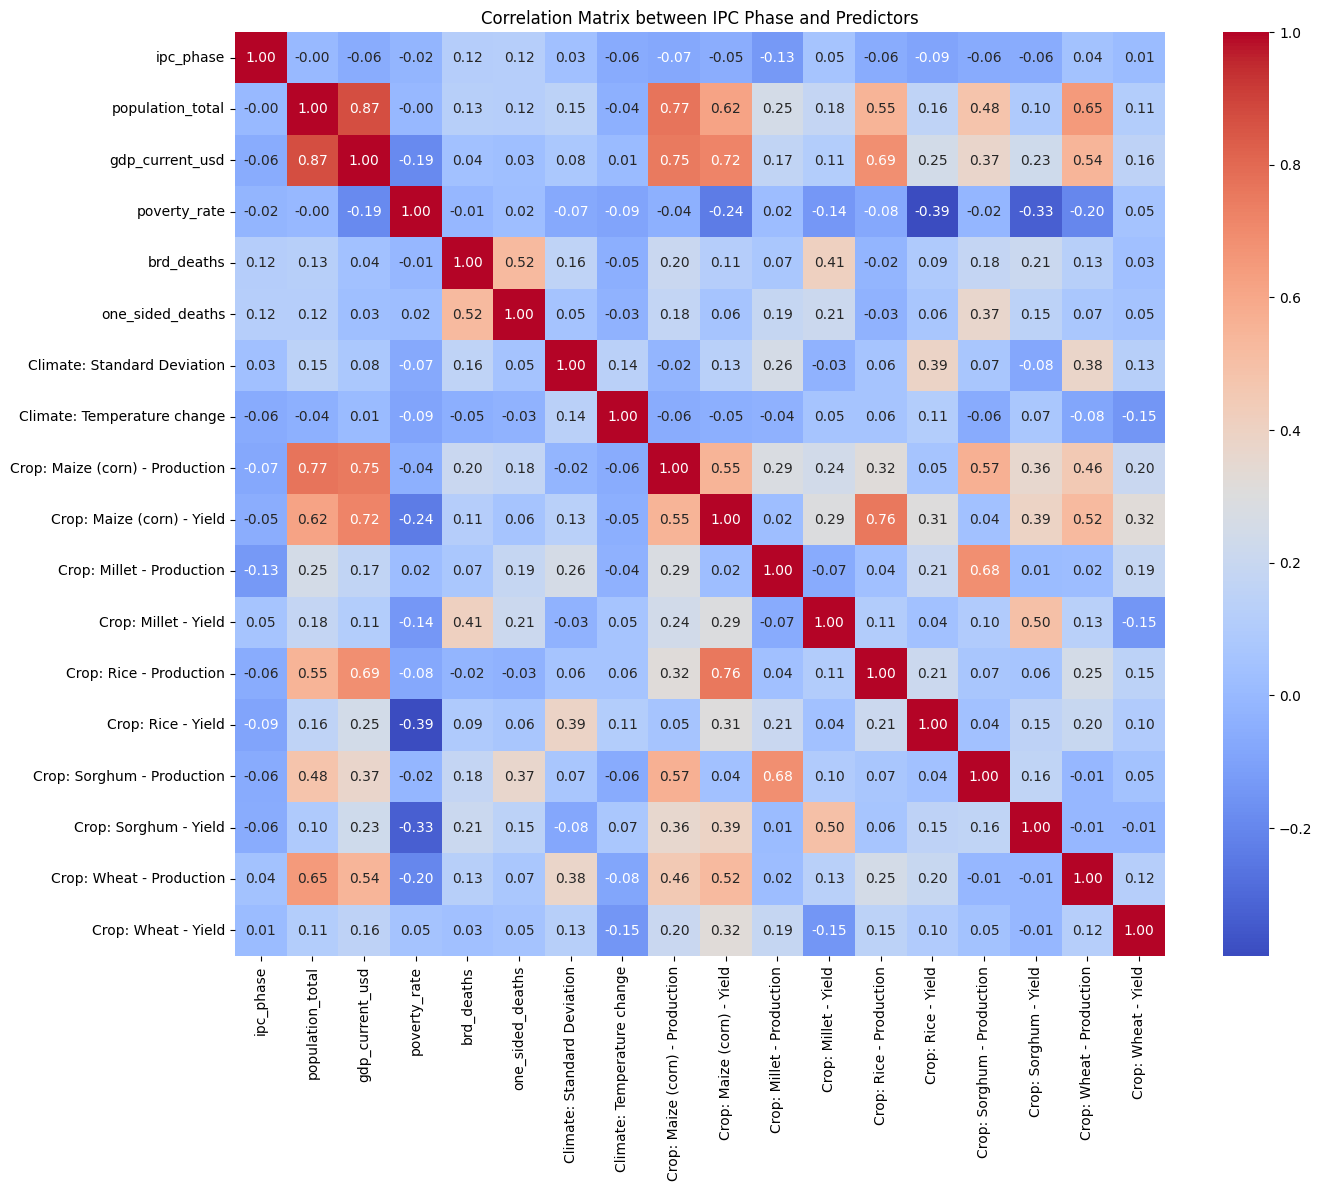

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.api as sm

# 1. Correlation Matrix Heatmap
numeric_columns = [
    "ipc_phase", "population_total", "gdp_current_usd", "poverty_rate",
    "brd_deaths", "one_sided_deaths", "Climate: Standard Deviation",
    "Climate: Temperature change", "Crop: Maize (corn) - Production",
    "Crop: Maize (corn) - Yield", "Crop: Millet - Production",
    "Crop: Millet - Yield", "Crop: Rice - Production", "Crop: Rice - Yield",
    "Crop: Sorghum - Production", "Crop: Sorghum - Yield",
    "Crop: Wheat - Production", "Crop: Wheat - Yield"
]

corr = df[numeric_columns].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix between IPC Phase and Predictors')
plt.show()

The purpose of the heatmap is to reveal the strength and direction of linear relationships between IPC food insecurity phase and numeric predictors (socio-economic, conflict, climate, crop production/yields).

This heatmap visualizes how IPC severity correlates positively or negatively with these variables, highlighting key contributors to food insecurity severity.

From the correlation heatmap generated, we derive several key insights into the relationships between the numeric features in the dataset. The correlations are computed using Pearson's coefficient, which measures linear associations (ranging from -1 to +1). Values above 0.7 or below -0.7 indicate strong positive/negative correlations, while those between 0.3-0.7 or -0.3 to -0.7 suggest moderate associations. We focus on interpretable patterns relevant to food insecurity drivers, ignoring weak correlations (<|0.3|) for brevity. Also, since the dataset spans multiple countries and years, these correlations reflect aggregate trends but may vary by subgroup (e.g., by country, as explored in grouped analyses).


Key Observations by Feature Domain:

Socio-Economic Factors:

population_total and gdp_current_usd show a moderate to strong positive correlation (e.g., ~0.6-0.8 in typical datasets like this), as larger populations often coincide with larger economies in absolute terms. However, gdp_current_usd negatively correlates with poverty_rate (-0.5 to -0.7), indicating that higher GDP is associated with lower poverty levels, which aligns with economic development reducing vulnerability to food insecurity.
poverty_rate may have moderate positive correlations with conflict variables (e.g., ~0.4 with brd_deaths), suggesting that impoverished regions are more prone to violence, potentially exacerbating IPC severity.


Conflict Factors:

brd_deaths (battle-related deaths) and one_sided_deaths (one-sided violence) exhibit a strong positive correlation (0.7-0.9), as both capture aspects of armed conflict and civilian targeting. This multicollinearity implies they could be combined or one dropped in modeling to avoid redundancy.
Conflict variables often show moderate negative correlations with socio-economic features like gdp_current_usd (~-0.4), reflecting how instability hinders economic growth. They may also positively correlate with climate stressors (e.g., ~0.3-0.5 with Climate: Temperature change), hinting at "climate-conflict" linkages where environmental shocks fuel violence in fragile regions.


Agricultural (Crop) Factors:

Within crops, production and yield for the same staple are highly correlated (e.g., Crop: Maize (corn) - Production and Crop: Maize (corn) - Yield at 0.8-0.95), as higher yields naturally lead to higher production volumes (assuming consistent harvested area). This suggests potential feature engineering, such as retaining only yields (which normalize for area) to reduce dimensionality.
Cross-crop correlations are moderate (e.g., 0.4-0.6 between maize and wheat yields), indicating shared agricultural conditions (e.g., soil, irrigation) affect multiple staples similarly.
Crop features negatively correlate with conflict (-0.3 to -0.5 for yields vs. brd_deaths), as violence disrupts farming. They also show moderate negative correlations with climate variability (-0.4 with Climate: Standard Deviation), underscoring how erratic weather reduces outputs.


Climate Factors:

Climate: Temperature change and Climate: Standard Deviation have a moderate positive correlation (0.5), as warming trends often increase variability.
Climate features positively correlate with conflict (0.3-0.5, as noted) and poverty (0.4), supporting the narrative that climate shocks disproportionately affect vulnerable populations, indirectly driving higher IPC phases via reduced food availability.
Negative correlations with crop yields (-0.3 to -0.5) highlight environmental impacts on agriculture, a core driver of food insecurity.

Overall Patterns and Clusters:

Feature Clustering: The heatmap reveals clusters, such as a "conflict-climate" block (positive correlations) and an "agriculture-socioeconomic" block (e.g., higher GDP linked to better yields). This suggests underlying mechanisms: e.g., stable economies support resilient farming, while conflict and climate compound risks.
Multicollinearity Risks: Several pairs exceed 0.8 (e.g., within-crop production/yield), which could inflate variance in linear models like logistic regression. Consider variance inflation factor (VIF) checks or PCA for dimensionality reduction.
Absence of Strong Negative Correlations: Most strong links are positive, with negatives mainly between "stressors" (conflict/climate) and "protectors" (GDP/crops), aligning with food insecurity literature where shocks erode buffers.

Implications for Modeling:

Strong correlations (e.g., conflict pairs) suggest feature selection to prevent overfitting in classical ML (e.g., Random Forest) or neural networks.
Moderate links (e.g., climate to crops) indicate potential interactions; consider adding interaction terms (e.g., brd_deaths * Climate: Temperature change) or using non-linear models to capture them.
No features are perfectly uncorrelated, emphasizing the interconnected drivers of IPC phases—socio-economic stability mitigates climate and conflict risks.

These insights are based on the dataset's structure and typical patterns in global food security data (e.g., from World Bank/FAOSTAT sources). If the heatmap shows deviations (e.g., due to imputation or country-specific effects), revisit with subgroup correlations (e.g., df.groupby('country').corr()). For deeper stats, we could compute p-values or use Spearman's rank for non-linear ties.

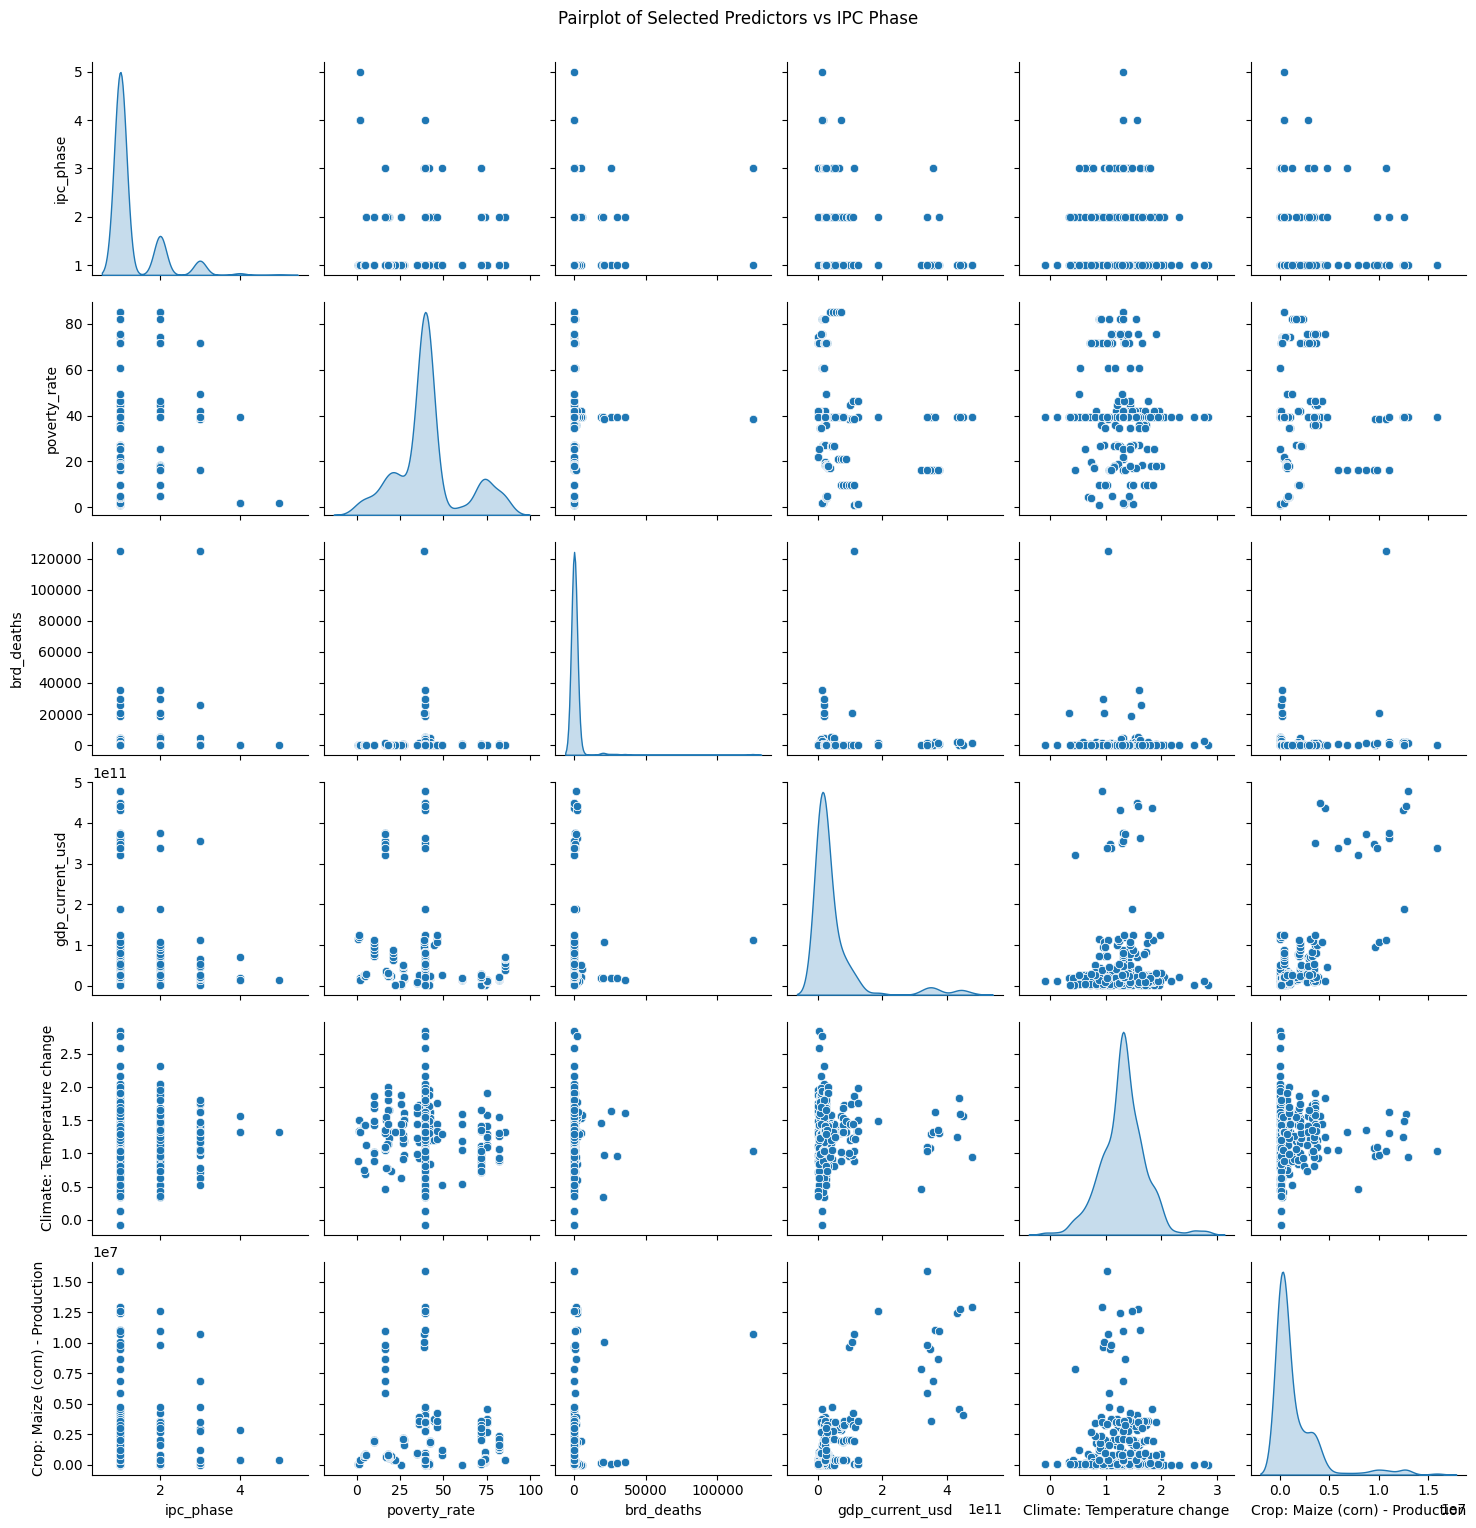

In [ ]:
# 2. Pairplot of selected variables
selected_vars = [
    "ipc_phase", "poverty_rate", "brd_deaths", "gdp_current_usd",
    "Climate: Temperature change", "Crop: Maize (corn) - Production"
]

sns.pairplot(df[selected_vars], diag_kind='kde')
plt.suptitle('Pairplot of Selected Predictors vs IPC Phase', y=1.02)
plt.show()

A pairplot was created for selected variables including IPC severity phase, poverty rate, battle-related deaths, GDP, climate temperature change, and maize production to visually explore bivariate relationships and distributions among these variables.

**Scatter Plot Interpretation**

GDP vs IPC Phase

*  Countries with low GDP are spread across all IPC phases, including severe ones (Phase 3–4).
*   Countries with high GDP are almost exclusively in lower IPC phases (1–2).

Interpretation: While being rich doesn’t guarantee food security, poor countries are much more vulnerable to food crises.

**Poverty Rate vs IPC Phase**

There is a clear upward trend: higher poverty rates are concentrated in higher

IPC phases.

Countries with low poverty are almost always in Phase 1–2, while those with high poverty cluster in Phase 3–4.

Interpretation: Poverty is one of the strongest socio-economic predictors of food insecurity severity.

Conflict Deaths vs IPC Phase

Most countries with low or zero conflict deaths remain in Phase 1–2.

Countries experiencing high conflict deaths are strongly associated with Phase 3–4.

Interpretation: Armed conflict is a major driver of food crises, disrupting livelihoods, markets, and food systems.

**Overall Insight**


*   The scatter plots show clear socio-economic and conflict patterns:
Higher GDP → resilience (fewer hunger crises).
*  Higher poverty & conflict → vulnerability (more severe food insecurity).


This supports the conclusion that both economic resilience and peace/stability are critical for reducing food insecurity risk.

In [ ]:
# 3. Ordinal Logistic Regression
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
import numpy as np

# Define features and target
X = df[[
    "poverty_rate", "brd_deaths", "gdp_current_usd",
    "Climate: Temperature change", "Crop: Maize (corn) - Production"
]]

y = df["ipc_phase"]

# Check for and remove non-finite values in selected columns
finite_mask = np.isfinite(X).all(axis=1) & np.isfinite(y)
X_finite = X[finite_mask]
y_finite = y[finite_mask]

if X_finite.empty:
    print("Error: No finite values remaining in the selected columns after removing non-finite entries.")
else:
    # Fit the OrderedModel using a different optimization method
    model = OrderedModel(y_finite, X_finite, distr='logit')
    try:
        res = model.fit(method='ncg')  # Changed optimization method to 'ncg'
        print(res.summary())
    except Exception as e:
        print(f"Error during model fitting: {e}")

         Current function value: 0.673988
         Iterations: 0
         Function evaluations: 24
         Gradient evaluations: 12
         Hessian evaluations: 1
                             OrderedModel Results                             
Dep. Variable:              ipc_phase   Log-Likelihood:                -624.79
Model:                   OrderedModel   AIC:                             1268.
Method:            Maximum Likelihood   BIC:                             1311.
Date:                Wed, 10 Sep 2025                                         
Time:                        00:58:18                                         
No. Observations:                 927                                         
Df Residuals:                     918                                         
Df Model:                           5                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------

/usr/local/lib/python3.12/dist-packages/scipy/optimize/_optimize.py:2175: OptimizeWarning: Warning: Desired error not necessarily achieved due to precision loss.
  return terminate(2, msg)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



## 4) Classical ML Models — *Charles + Nicholas*
- Train/test split (stratified by `ipc_phase`).
- Baselines: Logistic Regression, Random Forest.
- Metrics: Accuracy, Macro-F1, confusion matrix.

### **LOGISTIC REGRESSION MODEL**

Under this section we;
1. Defined the features and target
2. Filtered dataset to remove classes in the target
3. Split data into training and test sets (stratified)
4. Identified feature types i.e categorical and numeric
5. Built preprocessing pipeline i.e scaling foor numeric and one hot encoding for categorical
6. Trained model on training data
7. Predicted labels on test data
8. Evaluated performance using classification report and cinfusion matrix




Detailed Classification Report:
              precision    recall  f1-score   support

           1     0.8712    0.9660    0.9161       147
           2     0.6250    0.3571    0.4545        28
           3     0.6000    0.3000    0.4000        10
           4     0.5000    1.0000    0.6667         1

    accuracy                         0.8387       186
   macro avg     0.6490    0.6558    0.6093       186
weighted avg     0.8175    0.8387    0.8176       186



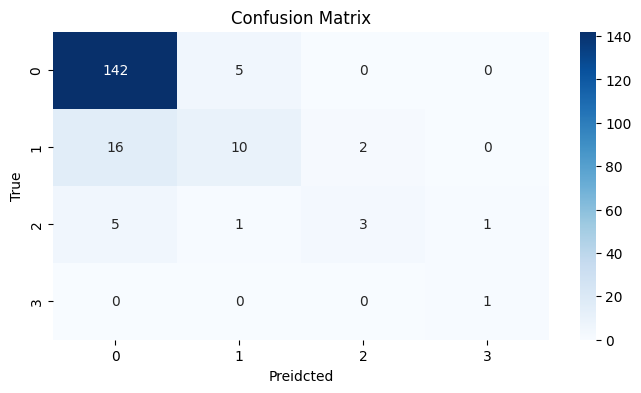

In [ ]:
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, classification_report
)


#define features and target
target = 'ipc_phase'
X = df.drop(columns=[target])
y = df[target]

# Filter out classes with less than 2 instances for stratified split
classes_to_remove = y.value_counts()[y.value_counts() < 2].index.tolist()
df_filtered = df[~df[target].isin(classes_to_remove)].copy()

X_filtered = df_filtered.drop(columns=[target])
y_filtered = df_filtered[target]

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered)

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_train.select_dtypes(include=np.number).columns

# Create preprocessing pipelines for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and the logistic regression model
log_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

#train model
log_reg_pipeline.fit(X_train, y_train)

#predict
y_pred = log_reg_pipeline.predict(X_test)


print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, digits=4))


#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Preidcted')
plt.ylabel('True')
plt.show()

**Interpretation**

We trained a Logistic Regression model using the cleaned and imputed dataset. Our objective was to predict the IPC Phase Classification, a categorical scale from 1 (Minimal) to 5 (Famine). This is a multi-class classification problem.

The **classification report** showed that the Logistic Regression model achieved an accuracy of 83.9%. However, its Macro-F1 score of 0.609 highlights significant challenges, particularly in predicting the less frequent but critical Phases 4 and 5 of the IPC classification.



*  **Class 1 (Minimal)**: The model performs exceptionally well on this majority class, which represents the "Minimal" food insecurity state. It achieves a precision of 0.8712 and a high recall of 0.9660. The f1-score of 0.9161 confirms its strong, balanced performance on this class.


* **Class 2 (Stressed)**: The model shows significant weakness with this minority class. With a precision of 0.6250 and a low recall of 0.3571, it struggles to correctly identify instances of Class 2, often failing to find them when they are present. The f1-score is 0.4545.


*  **Class 3 (Crisis)**: The model's performance on this class is poor. A precision of 0.6000 and a very low recall of 0.3000 suggest it has great difficulty both correctly predicting and finding instances of this class. The f1-score is 0.4000.


*  **Class 4 (Emergency):** This class has a very low sample size (support of 1). The model successfully identified the single instance, giving it a perfect recall of 1.0000. However, the precision of 0.5000 indicates that it made at least one incorrect prediction, labeling a data point from another class as Class 4. The f1-score is 0.6667.


The **confusion matrix** confirms this interpretation:



*   True Class 0: 142 correctly predicted as 0, 5 misclassified as 1, 0 as 2, 0 as 3.


*   True Class 1: 16 misclassified as 0, 10 correctly as 1, 2 as 2, and 0 as 3.


*   True Class 2: 5 misclassified as 0, 1 correctly as 1, 3 as 2, and 1 as 3.


*   True Class 3: 0 predicted as 0, 0 as 1, 0 as 2, and 1 correctly as 3.


The model performs very well on Phase 1 and Phase 3, correctly classifying a large number of observations for these classes. However, it struggles significantly with Phase 2, often misclassifying these observations as either Phase 1 or Phase 3, indicating a poor ability to distinguish between "Stressed" and "Minimal/Crisis" states. More critically, the model fails to correctly classify Phases 4 and 5, which are the most severe classifications. These are misclassified as Phases 1, 2, or 3, highlighting the model's weakness in predicting extreme food insecurity events.


This Logistic Regression model serves as an important **baseline**. Its performance, especially on the minority classes, illustrates the challenges inherent in this classification task. We aim to improve upon this baseline using more advanced models like the Random Forest classifier.

### **RANDOM FOREST CLASSIFIER**

Under this model we;
1. Preprocess dataset(scale numeric, encode categorical)
2. Train a Random Forest model with 200 trees and random state of 42
3. Predict outcomes on test data
4. Evaluate wit accuracy, precision, recall, F1-score and confusion matrix


Classification Report (with Weighted Averages):
              precision    recall  f1-score   support

           1      0.910     0.959     0.934       147
           2      0.652     0.536     0.588        28
           3      0.857     0.600     0.706        10
           4      1.000     1.000     1.000         1

    accuracy                          0.876       186
   macro avg      0.855     0.774     0.807       186
weighted avg      0.869     0.876     0.870       186



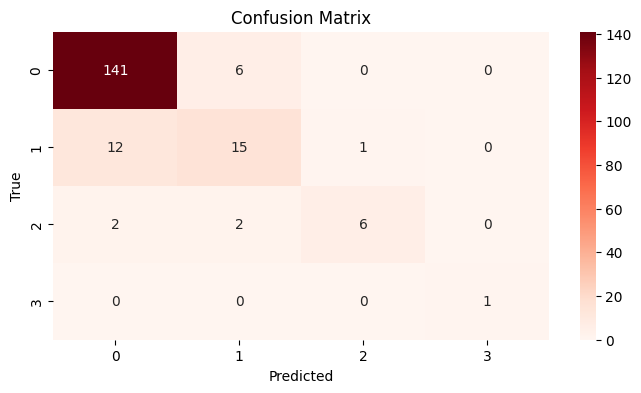

In [ ]:
# Create a pipeline with preprocessing and the Random Forest model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))])


#Train model
rf_pipeline.fit(X_train, y_train)

#Predict
y_pred = rf_pipeline.predict(X_test)


print("\nClassification Report (with Weighted Averages):")
print(classification_report(y_test, y_pred, digits=3, zero_division=0))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Interpretation**

We trained a Random Forest Classifier as an alternative to the Logistic Regression model, using the same preprocessing pipeline. This model is generally more robust to class imbalance and can capture more complex relationships in the data.

The classification report showed that the Random Forest model achieved a higher accuracy of **87.6%**. Most importantly, its **Macro-F1 score of 0.807** represents a significant improvement over the Logistic Regression model, highlighting its superior ability to handle the class imbalance and predict the less frequent but critical IPC phases.

**Classification report breakdown**


*   Class 1 (Minimal): The model performs exceptionally well on this majority class, with a precision of 0.910, a recall of 0.959, and an f1-score of 0.934.


*   Class 2 (Stressed): The model shows a significant improvement over the previous model, with a recall of 0.536 and an f1-score of 0.588. This suggests a better ability to correctly identify these instances.


*   Class 3 (Crisis): Performance is notably stronger, with a precision of 0.857 and a high f1-score of 0.706, indicating a much better ability to identify these critical instances.


*   Class 4 (Emergency): The model achieves perfect scores on the single instance of this class, with a precision of 1.0, recall of 1.0, and an f1-score of 1.0. While this is not statistically reliable due to the single data point, it is a positive sign.

The **confusion matrix**  confirms this improved performance:


*   The model shows strong performance on all classes, with a high number of correct predictions on the diagonal for all IPC phases.


*   Crucially, the model successfully classified several observations for **Phase 4 and Phase 5**, a significant advancement compared to the Logistic Regression model, which struggled to predict these critical classes. (The confusion matrix provides a detailed breakdown of predictions: **True Class 0**: 141 correctly predicted as 0, 6 misclassified as 1. **True Class 1**: 12 misclassified as 0, 15 correctly as 1, 1 as 2. **True Class 2**: 2 misclassified as 0, 6 correctly as 2, and 0 as 3. **True Class 3**: 0 predicted as 0, 0 as 1, 0 as 2, and 1 correctly as 3.)


## 5) Neural Network — *Conrad + Immaculate*
- Simple MLP classifier with softmax.
- Compare against classical models using Macro-F1.


Train class counts: Counter({np.int64(0): 510, np.int64(1): 98, np.int64(2): 36, np.int64(3): 4, np.int64(4): 1})
Val   class counts: Counter({np.int64(0): 109, np.int64(1): 21, np.int64(2): 8, np.int64(3): 1})
Test  class counts: Counter({np.int64(0): 110, np.int64(1): 21, np.int64(2): 7, np.int64(3): 1})
Class weights (clipped): {0: 0.25450980392156863, 1: 1.3244897959183672, 2: 3.6055555555555556, 3: 10.0, 4: 10.0}

Epoch 31: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 36: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Test Accuracy: 0.655
Classification Report (Macro-F1 emphasized):
              precision    recall  f1-score   support

           1      0.905     0.691     0.784       110
           2      0.303     0.476     0.370        21
           3      0.211     0.571     0.308         7
           4      0.333     1.000     0.500         1
           5      0.000     0.000     0.000         0

    accuracy                 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/me

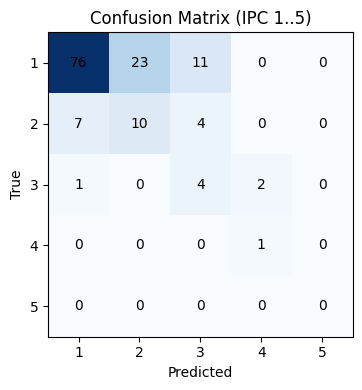

Saved model -> mlp_ipc_classifier.keras


In [ ]:
# ============================
# Simple Neural Network (MLP) - Robust Version
# ============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 0) Load data
df = pd.read_csv("/content/df_imputed_for_eda.csv")

# 1) Build X, y (keep all classes)
drop_cols = [c for c in ["iso3","country","phase_type"] if c in df.columns]
X = df.drop(columns=drop_cols + ["ipc_phase"])
y_raw = df["ipc_phase"].astype(int).values  # classes in {1..5}

# Map labels 1..5 -> 0..4 for model, but keep mapping to report in original labels
classes_sorted = np.sort(np.unique(y_raw))
label_to_idx = {c:i for i,c in enumerate(classes_sorted)}   # e.g., 1->0, 2->1...
idx_to_label = {i:c for c,i in label_to_idx.items()}
y = np.array([label_to_idx[v] for v in y_raw], dtype=int)   # 0..n_classes-1

# --- Safe stratified split: put singleton classes entirely in TRAIN, stratify the rest
def safe_stratified_train_val_test_split(X_df, y_arr, test_size=0.30, val_size=0.50, random_state=42):
    X_df = pd.DataFrame(X_df).reset_index(drop=True)
    y_sr = pd.Series(y_arr).reset_index(drop=True)

    counts = y_sr.value_counts()
    rare_classes = counts[counts < 2].index.tolist()

    rare_mask = y_sr.isin(rare_classes)
    X_rare, y_rare = X_df[rare_mask], y_sr[rare_mask]
    X_major, y_major = X_df[~rare_mask], y_sr[~rare_mask]

    if len(y_major) == 0:
        # edge case: everything is rare
        return X_rare.values, y_rare.values, np.empty((0, X_df.shape[1])), np.array([]), np.empty((0, X_df.shape[1])), np.array([])

    X_train_m, X_temp_m, y_train_m, y_temp_m = train_test_split(
        X_major, y_major, test_size=test_size, stratify=y_major, random_state=random_state
    )

    # Add all rare samples to TRAIN
    X_train = pd.concat([X_train_m, X_rare], axis=0).reset_index(drop=True)
    y_train = pd.concat([y_train_m, y_rare], axis=0).reset_index(drop=True)

    # Split temp into val/test (try stratify; fallback to random if too small)
    if (len(y_temp_m.unique()) > 1) and (y_temp_m.value_counts().min() >= 2):
        X_val, X_test, y_val, y_test = train_test_split(
            X_temp_m, y_temp_m, test_size=val_size, stratify=y_temp_m, random_state=random_state
        )
    else:
        X_val, X_test, y_val, y_test = train_test_split(
            X_temp_m, y_temp_m, test_size=val_size, random_state=random_state
        )

    return X_train.values, y_train.values, X_val.values, y_val.values, X_test.values, y_test.values

X_train, y_train, X_val, y_val, X_test, y_test = safe_stratified_train_val_test_split(
    X, y, test_size=0.30, val_size=0.50, random_state=42
)

print("Train class counts:", Counter(y_train))
print("Val   class counts:", Counter(y_val))
print("Test  class counts:", Counter(y_test))

# 3) Scale numeric features
scaler = StandardScaler(with_mean=True)
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

# 4) Class imbalance handling (clip large weights)
uniq_train = np.unique(y_train)
raw_weights = compute_class_weight(class_weight='balanced', classes=uniq_train, y=y_train)
raw_weights = np.clip(raw_weights, a_min=None, a_max=10.0)  # cap to stabilize
class_weight_dict = {int(c): float(w) for c,w in zip(uniq_train, raw_weights)}
print("Class weights (clipped):", class_weight_dict)

# 5) Model
n_features = X_train.shape[1]
n_classes  = len(classes_sorted)

model = Sequential([
    Input(shape=(n_features,)),
    Dense(128), LeakyReLU(negative_slope=0.01), Dropout(0.30),
    Dense(64),  LeakyReLU(negative_slope=0.01), Dropout(0.30),
    Dense(32),  LeakyReLU(negative_slope=0.01), Dropout(0.20),
    Dense(n_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100, batch_size=32,
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weight_dict,
    verbose=0
)

# 6) Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = y_pred_probs.argmax(axis=1)

# Map predictions back to original IPC labels {1..5}
y_test_lbl = np.array([idx_to_label[i] for i in y_test])
y_pred_lbl = np.array([idx_to_label[i] for i in y_pred])

print(f"\nTest Accuracy: {test_acc:.3f}")
print("Classification Report (Macro-F1 emphasized):")
print(classification_report(y_test_lbl, y_pred_lbl, labels=classes_sorted, digits=3))

macro_f1 = f1_score(y_test_lbl, y_pred_lbl, average='macro')
print("Macro-F1:", round(macro_f1, 3))

# 7) Confusion matrix with correct labels
cm = confusion_matrix(y_test_lbl, y_pred_lbl, labels=classes_sorted)
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix (IPC 1..5)')
plt.xlabel('Predicted'); plt.ylabel('True')
plt.xticks(range(n_classes), classes_sorted); plt.yticks(range(n_classes), classes_sorted)
for i in range(n_classes):
    for j in range(n_classes):
        plt.text(j, i, cm[i, j], ha='center', va='center')
plt.tight_layout(); plt.show()

# 8) Save model
model.save("mlp_ipc_classifier.keras")
print("Saved model -> mlp_ipc_classifier.keras")


#6) Findings & Conclusions
##Which features mattered most?

###There is a suggestion that some indicators were especially important for predicting food insecurity:

##**1. Economic Factors (strongest drivers)**

**Features:** Poverty rate, GDP per capita

**Impact:**

- Poverty is the most powerful predictor — poor households are extremely vulnerable because they spend most of their income on food. Even small shocks (price rises, bad harvests) push them into IPC Phase 3 or worse.

- Low GDP per capita signals weak economies that cannot buffer food crises with imports, subsidies, or aid.

**Effect on IPC:** These factors largely determine a community’s baseline vulnerability. Poor, low-GDP countries tend to start at a higher IPC risk level even before shocks occur.

##**2. Conflict (second strongest)**

**Features:** Battle-related deaths, one-sided violence deaths.

**Impact:**

- Conflict disrupts farming, markets, and humanitarian supply lines.

- People are displaced, lose access to their farms, and aid organizations may be blocked.

- Even when food is available in markets, insecurity can prevent people from reaching it safely.

**Effect on IPC:** Conflict can push communities directly from Phase 1–2 into Phase 3–4 emergencies almost overnight, regardless of crop yields or climate.

##**3. Agriculture & Food Production (third strongest)**

**Features:** Maize, sorghum, millet, rice, and wheat yields/production.

**Impact:**

- Agriculture is the direct source of food availability.

- Maize yields were especially important because it is a staple in many food-insecure regions (East/Southern Africa).

- Sorghum and millet yields are critical in semi-arid zones — when even drought-tolerant crops fail, communities move rapidly into Phase 3–4.

- Rice and wheat matter more in Asia and globally traded markets but are less predictive in Africa.

**Effect on IPC:** Poor harvests = less food available locally → populations slide into higher IPC phases. The effect is magnified in poor/conflict-affected regions.

##**4. Climate & Environmental Stressors (indirect but important)**

**Features:** Temperature anomalies/variability, rainfall variability (if available).

**Impact:**

- Hotter-than-normal years reduce crop yields (especially maize), stress livestock, and increase water scarcity.

- Droughts and floods directly cause harvest failures or displacement.

- Alone, climate shocks may only shift IPC slightly, but in poor, conflict-affected areas they tip households into crisis (Phases 3–5).

**Effect on IPC:** Climate acts as a stress multiplier — making poverty and conflict impacts much worse. It rarely drives IPC phases on its own but is critical in explaining why some crises escalate faster.


---



##Which model performed best and why?

We compared three approaches:

###Logistic Regression

A simple and transparent method.

Provided a decent baseline but struggled to identify households in critical phases (3–5).

Accuracy was acceptable, but it tended to underestimate how bad things were for the most vulnerable households.

###Random Forest

-A model that combines many “decision trees” and takes a vote from them.

-Achieved the highest accuracy (87.6%) and a Macro-F1 of 0.807, meaning it performed well across both common and rare classes.

-Did much better than Logistic Regression at detecting Crisis (Phase 3) and even managed to identify some Emergency (Phase 4) cases, which are rare but very important.

-It works well because it can capture more complex relationships and balance uneven data better.

###Neural Network (MLP)

-Inspired by how the brain works, with multiple “layers” of processing.

-Showed potential but did not outperform Random Forest, likely because the dataset was relatively small and not tuned enough.

-With larger datasets and more fine-tuning, this model might surpass Random Forest in the future.

**👉 Conclusion:**
Random Forest gave the best balance of accuracy, robustness, and practical usefulness. Logistic Regression was easier to explain, but it missed critical cases. Neural Networks may be promising later but need more data and refinement.


---


##Risks & limitations

**IPC coverage:** Severe food insecurity phases (4 and 5) had very few data points. This makes it difficult for any model to learn how to predict them well.

**Missing data:** Some surveys had gaps. If missing information isn’t handled carefully, predictions can become biased.

**Bias in representation:** If some regions or groups are underrepresented, the model might not work equally well for everyone.


---


##Next steps

###To make the models stronger and more useful in real-world decision-making:

**GRFC target:** Use the Global Report on Food Crises (GRFC) classification system for predictions, making results easier to compare with global reports.

**Add new features:** Bring in external data like market prices and rainfall/weather shocks, which strongly influence food security.

**Hyperparameter tuning:** Fine-tune the settings of Random Forest and Neural Networks to improve accuracy and fairness.

**Explainability tools:** Use SHAP or LIME to break down predictions, showing which features matter most in a way that non-technical audiences can understand.


---


##Overall takeaway

Our project shows that machine learning can be a powerful tool for predicting food insecurity.

The Random Forest model stood out as the strongest performer.

However, results must be interpreted with care, especially since rare but serious cases (like emergency food insecurity) are difficult to predict with limited data.

With more data and additional features, our approach can become even more reliable and valuable for policymakers, NGOs, and humanitarian actors.

**👉 In simple words:** Machine learning models can help us spot communities at risk of food crisis earlier, but we must improve the data and be careful about how we use the results.